### Bnaya Avivi 318403854

In [3]:
import pandas as pd #pandas library
from pandas_datareader import data #data readers (google, html, etc.)
#The following line ensures that graphs are rendered in the notebook (and not in another window)
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt #Plotting library
import datetime as dt #datetime for timeseries support
import re

In [4]:
data=pd.read_csv("matala2_cosmetics_2019-Nov.csv")

C:\Users\Sarah\AppData\Local\Temp\ipykernel_25380\1002289364.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("matala2_cosmetics_2019-Nov.csv")


In [7]:
data['event_time'] = pd.to_datetime(data['event_time'],format = '%Y-%m-%d %H:%M:%S %Z')
print(data.dtypes) # print the data types of each column in the dataframe


event_time       datetime64[ns, UTC]
event_type                    object
product_id                     int64
category_id                    int64
category_code                 object
brand                         object
price                         object
user_id                        int64
user_session                  object
dtype: object


In [8]:
data=data.dropna(subset=['user_session'])

Q1

In [9]:
data = data.sort_values(['user_session','event_time'])

data = data.reset_index()

In [10]:
data['next_date'] = data['event_time'].shift(-1)
data['next_session'] = data['user_session'].shift(-1)

data['duration_to_next_event']= data.apply(lambda row: (row['next_date'] - row['event_time']) if row['user_session'] == row['next_session'] else 0 ,axis=1)

data.drop(columns=['next_date'],inplace=True)
data.drop(columns=['next_session'],inplace=True)
data = data.sort_values('index')
data.set_index('index',inplace=True)


In [11]:
#data_sorted
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
index,,,,,,,,,,
0,2019-11-01 00:00:02+00:00,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,0 days 00:00:23
1,2019-11-01 00:00:09+00:00,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0 days 00:00:15
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,0 days 00:00:45
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,0 days 00:01:43
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46+00:00,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,0
4635833,2019-11-30 23:59:47+00:00,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95,0
4635834,2019-11-30 23:59:47+00:00,view,5867785,1487580007835370453,NaN,kims,31.1,572579084,d42865b7-7e04-4038-9be0-a59165625f06,0


## Q2

In [12]:
data['event_time'] = data['event_time'].astype(str)
data['event_time'] = data['event_time'].str[:-6]

In [13]:
df=data
import datetime
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
index,,,,,,,,,,
0,2019-11-01 00:00:02,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,0 days 00:00:23
1,2019-11-01 00:00:09,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0 days 00:00:15
2,2019-11-01 00:00:10,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,0 days 00:00:45
3,2019-11-01 00:00:11,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,0 days 00:01:43
4,2019-11-01 00:00:24,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,0
4635833,2019-11-30 23:59:47,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95,0
4635834,2019-11-30 23:59:47,view,5867785,1487580007835370453,NaN,kims,31.1,572579084,d42865b7-7e04-4038-9be0-a59165625f06,0


In [14]:
df = df.sort_values(by=['user_id', 'event_time'], ascending=True)
df=df.reset_index()
df

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
0,437209,2019-11-04 15:28:57,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0
1,2483241,2019-11-19 09:56:09,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0
2,2494623,2019-11-19 11:14:48,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0
3,2640971,2019-11-20 11:58:06,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0 days 00:00:21
4,2641003,2019-11-20 11:58:27,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0 days 00:01:12
...,...,...,...,...,...,...,...,...,...,...,...
4635019,4635733,2019-11-30 23:56:14,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0 days 00:00:03
4635020,4635736,2019-11-30 23:56:17,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0 days 00:00:04
4635021,4635737,2019-11-30 23:56:21,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0
4635022,4635752,2019-11-30 23:56:46,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0


In [15]:
df['event_time'] = df['event_time'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


In [16]:
%%time
df.sort_values(['user_id','event_time'],inplace=True)
df['more_than_5_days'] = df.groupby('user_id')['event_time'].diff().dt.days.apply(lambda x: 1 if x > 5 else 0) #creating new column with 1 if time between 2 rows is greater than 5 
df['funnel_number'] = df.groupby('user_id')['more_than_5_days'].cumsum() #using new column to create new column for funnels
df['funnel_number'] = df['funnel_number']+1 #getting first funnel as 1 and increasing instead of first being 0
df.drop('more_than_5_days',axis=1,inplace=True) #removing column that is not needed

Wall time: 43.3 s


In [18]:
df

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number
0,437209,2019-11-04 15:28:57,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0,1
1,2483241,2019-11-19 09:56:09,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0,1
2,2494623,2019-11-19 11:14:48,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0,1
3,2640971,2019-11-20 11:58:06,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0 days 00:00:21,1
4,2641003,2019-11-20 11:58:27,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0 days 00:01:12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4635019,4635733,2019-11-30 23:56:14,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0 days 00:00:03,1
4635020,4635736,2019-11-30 23:56:17,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0 days 00:00:04,1
4635021,4635737,2019-11-30 23:56:21,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0,1
4635022,4635752,2019-11-30 23:56:46,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0,1


## Q3

In [19]:
df['new_session'] = 0
df

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,new_session
0,437209,2019-11-04 15:28:57,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0,1,0
1,2483241,2019-11-19 09:56:09,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0,1,0
2,2494623,2019-11-19 11:14:48,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0,1,0
3,2640971,2019-11-20 11:58:06,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0 days 00:00:21,1,0
4,2641003,2019-11-20 11:58:27,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0 days 00:01:12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635019,4635733,2019-11-30 23:56:14,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0 days 00:00:03,1,0
4635020,4635736,2019-11-30 23:56:17,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0 days 00:00:04,1,0
4635021,4635737,2019-11-30 23:56:21,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0,1,0
4635022,4635752,2019-11-30 23:56:46,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0,1,0


In [20]:
df.loc[df.groupby(['user_id', 'funnel_number'])['user_session'].apply(lambda x: x != x.shift()), 'new_session'] = 1 #getting 1 if a row is different than the one after
df['index_in_funnel'] = df.groupby(['user_id','funnel_number'])['new_session'].cumsum() #cummulate the numbers found in the previous new column
df.drop('new_session',axis=1,inplace=True) #removing column that is not needed

In [21]:
df

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
0,437209,2019-11-04 15:28:57,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0,1,1
1,2483241,2019-11-19 09:56:09,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0,1,1
2,2494623,2019-11-19 11:14:48,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0,1,2
3,2640971,2019-11-20 11:58:06,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0 days 00:00:21,1,3
4,2641003,2019-11-20 11:58:27,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0 days 00:01:12,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635019,4635733,2019-11-30 23:56:14,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0 days 00:00:03,1,1
4635020,4635736,2019-11-30 23:56:17,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0 days 00:00:04,1,1
4635021,4635737,2019-11-30 23:56:21,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0,1,1
4635022,4635752,2019-11-30 23:56:46,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0,1,1


Q4

In [23]:
def clean(row):
    x = row['price']
    if isinstance(x, str) and len(re.findall('[0-9]+\.[0-9]+', x)) == 1:
        y = re.findall('[0-9]+\.[0-9]+', x)
        return float(y[0])
    if isinstance(x, str) and len(re.findall('[0-9]+', x)) == 1:
        y = re.findall('[0-9]+', x)
        return float(y[0])
    return x   
        
df['price']= df.apply(clean, axis=1)

df

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel,price_2
0,437209,2019-11-04 15:28:57,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0,1,1,4.05
1,2483241,2019-11-19 09:56:09,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0,1,1,6.03
2,2494623,2019-11-19 11:14:48,view,5814066,1487580005855658874,NaN,grattol,2.30,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0,1,2,2.30
3,2640971,2019-11-20 11:58:06,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0 days 00:00:21,1,3,7.46
4,2641003,2019-11-20 11:58:27,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0 days 00:01:12,1,3,7.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635019,4635733,2019-11-30 23:56:14,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0 days 00:00:03,1,1,18.89
4635020,4635736,2019-11-30 23:56:17,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0 days 00:00:04,1,1,19.52
4635021,4635737,2019-11-30 23:56:21,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0,1,1,18.89
4635022,4635752,2019-11-30 23:56:46,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0,1,1,7.14


## Q5

In [24]:
vizual=df.groupby(['event_type']).agg(
{
    'event_time' : "count"}).reset_index()
vizual

,event_type,event_time
0,cart,1311146
1,purchase,322417
2,remove_from_cart,925338
3,view,2076123


<function matplotlib.pyplot.show(close=None, block=None)>

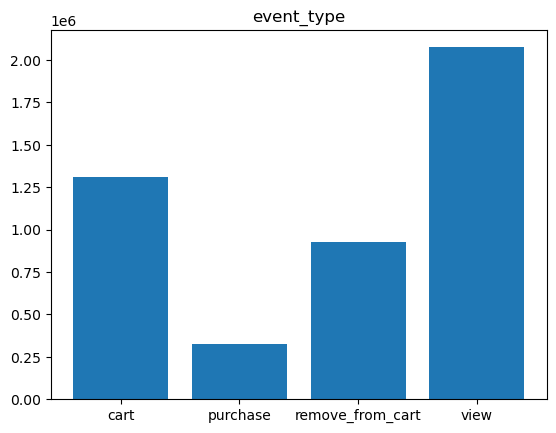

In [25]:
values = vizual.event_time

labels = vizual.event_type

plt.bar(labels, values)
plt.title('event_type')
plt.show

## Q6

In [26]:
df['duration_to_next_event']=df['duration_to_next_event'].apply(lambda row: 0 if type(row)==int else row.total_seconds())

In [27]:
a = df[df['event_type'] == "view"].groupby('user_session')['product_id'].agg(list).reset_index().rename(columns={'product_id': 'List_of_viewed'})
b= df[df['event_type'] == "cart"].groupby('user_session')['product_id'].agg(list).reset_index().rename(columns={'product_id': 'list_of_added_to_cart'})
c= df[df['event_type'] == "purchase"].groupby('user_session')['product_id'].agg(list).reset_index().rename(columns={'product_id': 'list_of_purchased'})

In [28]:
result = df.groupby(['user_id', 'user_session', 'funnel_number','index_in_funnel']).agg({
    'event_type': 'count',
    'duration_to_next_event': 'sum',
}).reset_index().rename(columns={'event_type': 'events_count','duration_to_next_event': 'session_duration (sec)'})

In [29]:
merged_df = result.merge(a, on='user_session', how='left').merge(b, on='user_session', how='left').merge(c, on='user_session', how='left')
merged_df.sort_values(by=['user_id','funnel_number','index_in_funnel'], ascending=[True,True,True])

,user_id,user_session,funnel_number,index_in_funnel,events_count,session_duration (sec),List_of_viewed,list_of_added_to_cart,list_of_purchased
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1,1,0.0,[5240],NaN,NaN
4,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,1,1,0.0,[5711145],NaN,NaN
1,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,2,1,0.0,[5814066],NaN,NaN
2,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,3,28,3789.0,"[5800358, 5800349, 5800349, 5800358, 5712576, ...",NaN,NaN
3,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,4,1,0.0,[5711087],NaN,NaN
...,...,...,...,...,...,...,...,...,...
1004812,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,1,1,1,0.0,[5881428],NaN,NaN
1004813,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,1,1,1,0.0,[5873630],NaN,NaN
1004814,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,1,5,38.0,"[5892179, 5886282, 5892179, 5900651, 5892179]",NaN,NaN
1004815,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,1,1,0.0,[5790563],NaN,NaN
